In [2]:
import pandas as pd

In [3]:
trans = pd.read_csv("Retail_Data_Transactions.csv")

In [4]:
trans

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [5]:
res =pd.read_csv("Retail_Data_Response.csv")
res

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [6]:
df = trans.merge(res,on='customer_id',how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [7]:
df.dtypes
df.shape

(125000, 4)

In [8]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [9]:
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [10]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [11]:
df.isnull()

,customer_id,trans_date,tran_amount,response
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
124995,False,False,False,False
124996,False,False,False,False
124997,False,False,False,False
124998,False,False,False,False


In [12]:
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [15]:
df['response']= df['response'].astype('int64')

C:\Users\krishna chaitrika\AppData\Local\Temp\ipykernel_11640\3058123356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']= df['response'].astype('int64')


In [16]:
set(df['response'])

{0, 1}

In [17]:
df.dtypes

customer_id    object
trans_date     object
tran_amount     int64
response        int64
dtype: object

In [18]:
#outliners checking
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['tran_amount']))

threshold = 2

outliners = z_scores>threshold 

print(df[outliners])

       customer_id trans_date  tran_amount  response
100001      CS7217  16-Nov-11           11         0
100015      CS8848  04-Feb-13           12         0
100024      CS7985  16-Aug-11           15         0
100035      CS7818  26-Dec-11           13         0
100041      CS7270  18-Nov-11           12         0
...            ...        ...          ...       ...
124961      CS8298  11-Jul-14           15         0
124971      CS8379  02-Nov-11           17         0
124978      CS8978  31-Aug-11           15         0
124983      CS8693  25-Aug-11           17         0
124998      CS8133  14-Dec-13           13         0

[3591 rows x 4 columns]


In [19]:
#outliners checking
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['tran_amount']))

threshold = 3

outliners = z_scores>threshold 

print(df[outliners])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


<function matplotlib.pyplot.show(close=None, block=None)>

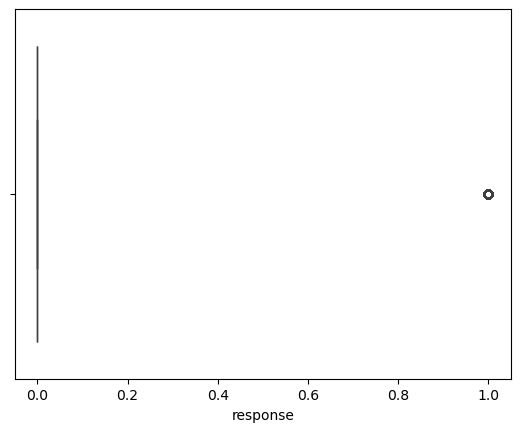

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.boxplot(x=df['response'])
plt.show

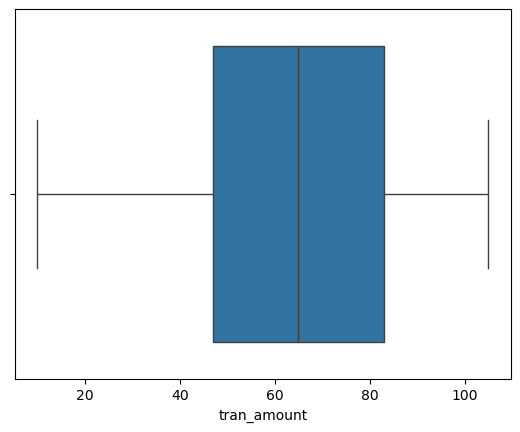

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.boxplot(x=df['tran_amount'])
plt.show()

In [24]:
print(df.columns)


Index(['customer_id', 'trans_date', 'tran_amount', 'response'], dtype='object')


In [29]:
df['date'] = pd.to_datetime(df['trans_date'], errors='coerce')  

C:\Users\krishna chaitrika\AppData\Local\Temp\ipykernel_11640\2941137444.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['trans_date'], errors='coerce')  # Converts invalid values to NaT
C:\Users\krishna chaitrika\AppData\Local\Temp\ipykernel_11640\2941137444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['trans_date'], errors='coerce')  # Converts invalid values to NaT


In [37]:
m_s=df.groupby('date')['tran_amount'].sum()
m_s=m_s.sort_values(ascending=False).reset_index()
m_s

,date,tran_amount
0,2011-07-16,8791
1,2014-05-20,8108
2,2012-11-15,8054
3,2011-08-11,7938
4,2011-09-18,7866
...,...,...
1396,2013-07-02,3915
1397,2011-11-25,3887
1398,2014-02-26,3830
1399,2012-08-18,3792


In [42]:
cust_count = df['customer_id'].value_counts().reset_index()
cust_count

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35
...,...,...
6879,CS8559,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


In [44]:
top_5 = cust_count.sort_values(by='count',ascending = False).head(5)
top_5

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


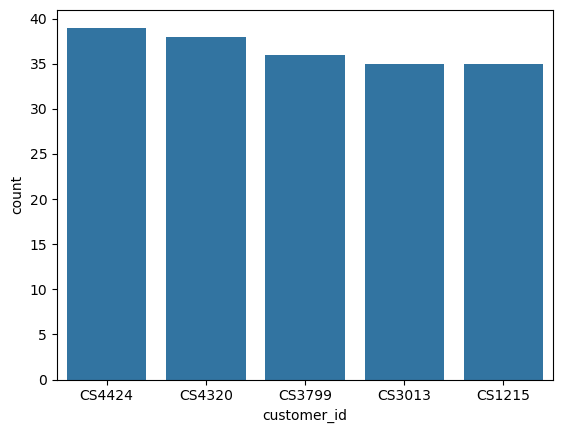

In [46]:
sns.barplot(x = 'customer_id',y='count',data = top_5)
plt.show()

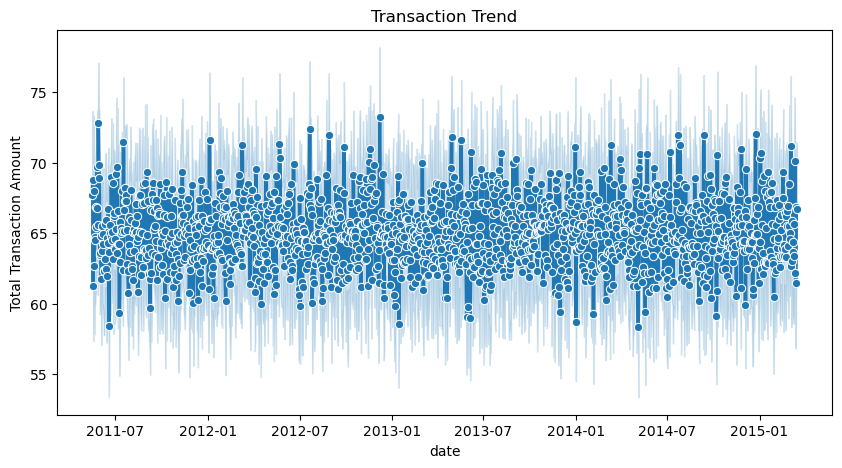

In [51]:
#analysis of the data
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['date'], y=df['tran_amount'], marker="o", linewidth=2.5)
plt.xlabel("date")
plt.ylabel("Total Transaction Amount")
plt.title("Transaction Trend")
plt.show()


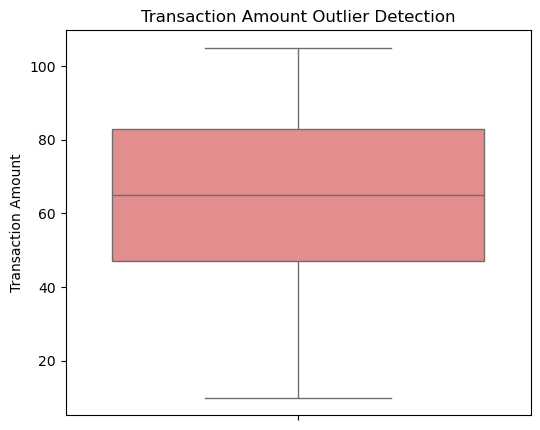

In [55]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['tran_amount'], color="lightcoral")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount Outlier Detection")
plt.show()


C:\Users\krishna chaitrika\AppData\Local\Temp\ipykernel_11640\2608762606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['date'], y=df['tran_amount'], palette="viridis")


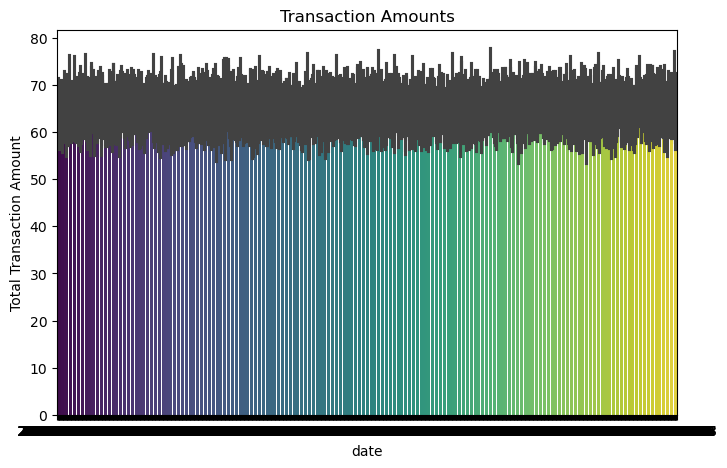

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['date'], y=df['tran_amount'], palette="viridis")
plt.xlabel("date")
plt.ylabel("Total Transaction Amount")
plt.title("Transaction Amounts")
plt.show()
